# 下载数据集

In [1]:
import os
os.chdir('mmdetection')

In [2]:
os.getcwd()

'/mnt/openmmlab-Camp/03-mmdetection-tutorial/mmdetection'

In [9]:
!wget https://download.openmmlab.com/mmyolo/data/cat_dataset.zip

--2023-06-08 14:42:06--  https://download.openmmlab.com/mmyolo/data/cat_dataset.zip
Resolving download.openmmlab.com (download.openmmlab.com)... 101.226.26.128, 101.226.26.139, 124.236.18.242
Connecting to download.openmmlab.com (download.openmmlab.com)|101.226.26.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 227204484 (217M) [application/zip]
Saving to: ‘cat_dataset.zip’

cat_dataset.zip     100%[===================>] 216.68M  31.4MB/s    in 7.1s    

2023-06-08 14:42:13 (30.6 MB/s) - ‘cat_dataset.zip’ saved [227204484/227204484]



In [10]:
!unzip cat_dataset.zip -d cat_dataset && rm cat_dataset.zip 
# 解压并删除压缩包

Archive:  cat_dataset.zip
   creating: cat_dataset/annotations/
  inflating: cat_dataset/annotations/annotations_all.json  
  inflating: cat_dataset/annotations/test.json  
  inflating: cat_dataset/annotations/trainval.json  
  inflating: cat_dataset/class_with_id.txt  
   creating: cat_dataset/images/
  inflating: cat_dataset/images/IMG_20210627_225110.jpg  
  inflating: cat_dataset/images/IMG_20210705_084125__01.jpg  
  inflating: cat_dataset/images/IMG_20210713_213907.jpg  
  inflating: cat_dataset/images/IMG_20210716_183123-02.jpeg  
  inflating: cat_dataset/images/IMG_20210718_213435.jpg  
  inflating: cat_dataset/images/IMG_20210725_193921.jpg  
  inflating: cat_dataset/images/IMG_20210726_161004.jpg  
  inflating: cat_dataset/images/IMG_20210726_161009.jpg  
  inflating: cat_dataset/images/IMG_20210727_213236.jpg  
  inflating: cat_dataset/images/IMG_20210728_205117.jpg  
  inflating: cat_dataset/images/IMG_20210728_205126.jpg  
  inflating: cat_dataset/images/IMG_20210728_20523

# 数据集可视化

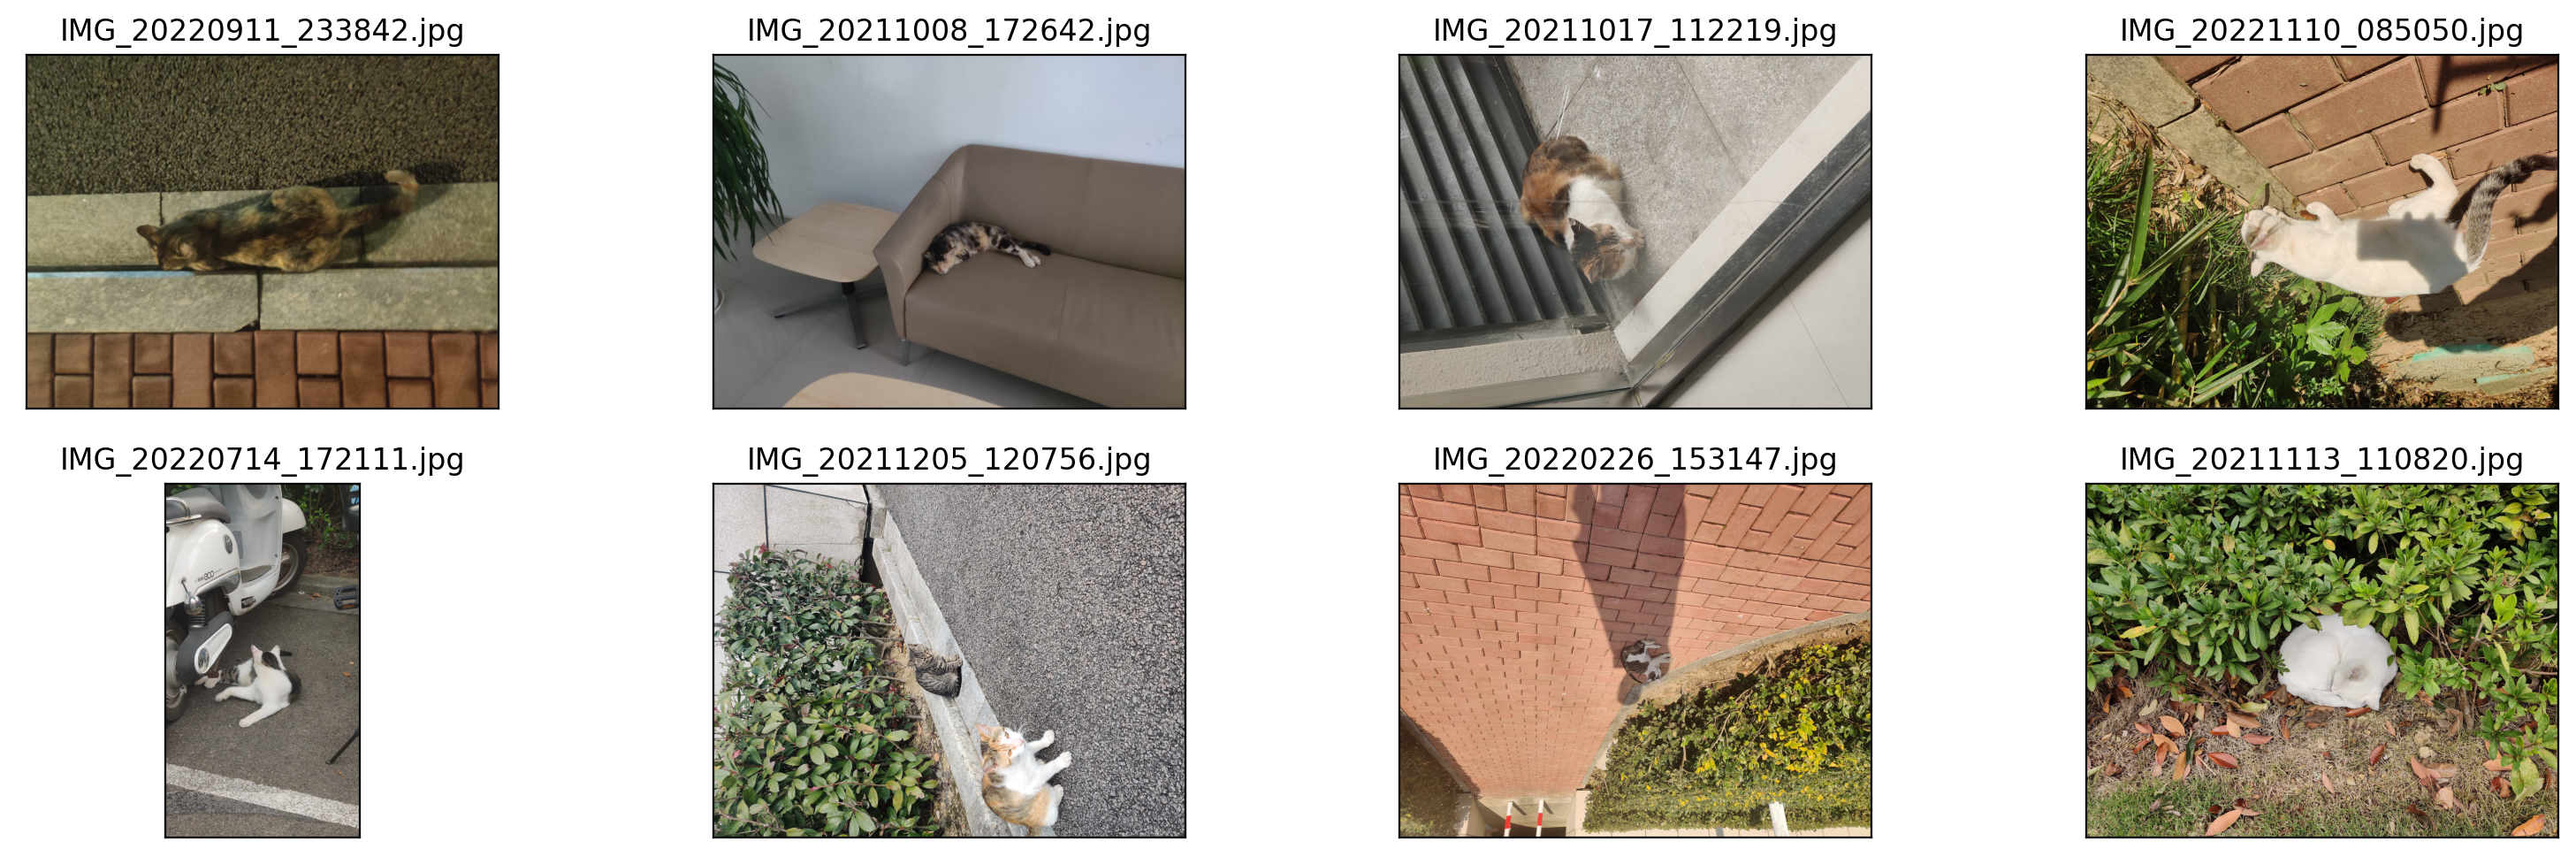

In [11]:
import os
import matplotlib.pyplot as plt
from PIL import Image

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

original_images = []
images = []
texts = []
plt.figure(figsize=(16, 5))

image_paths= [filename for filename in os.listdir('cat_dataset/images')][:8]

for i,filename in enumerate(image_paths):
    name = os.path.splitext(filename)[0]

    image = Image.open('cat_dataset/images/'+filename).convert("RGB")
  
    plt.subplot(2, 4, i+1)
    plt.imshow(image)
    plt.title(f"{filename}")
    plt.xticks([])
    plt.yticks([])

plt.tight_layout()

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


/tmp/ipykernel_427/885023740.py:23: DeprecationWarning: FLIP_LEFT_RIGHT is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.FLIP_LEFT_RIGHT instead.
  2: Image.FLIP_LEFT_RIGHT,
/tmp/ipykernel_427/885023740.py:24: DeprecationWarning: ROTATE_180 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_180 instead.
  3: Image.ROTATE_180,
/tmp/ipykernel_427/885023740.py:25: DeprecationWarning: FLIP_TOP_BOTTOM is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.FLIP_TOP_BOTTOM instead.
  4: Image.FLIP_TOP_BOTTOM,
/tmp/ipykernel_427/885023740.py:26: DeprecationWarning: TRANSPOSE is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.TRANSPOSE instead.
  5: Image.TRANSPOSE,
/tmp/ipykernel_427/885023740.py:27: DeprecationWarning: ROTATE_270 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_270 instead.
  6: Image.ROTATE_270,
/tmp/ipykernel_427/885023740.py:28: DeprecationW

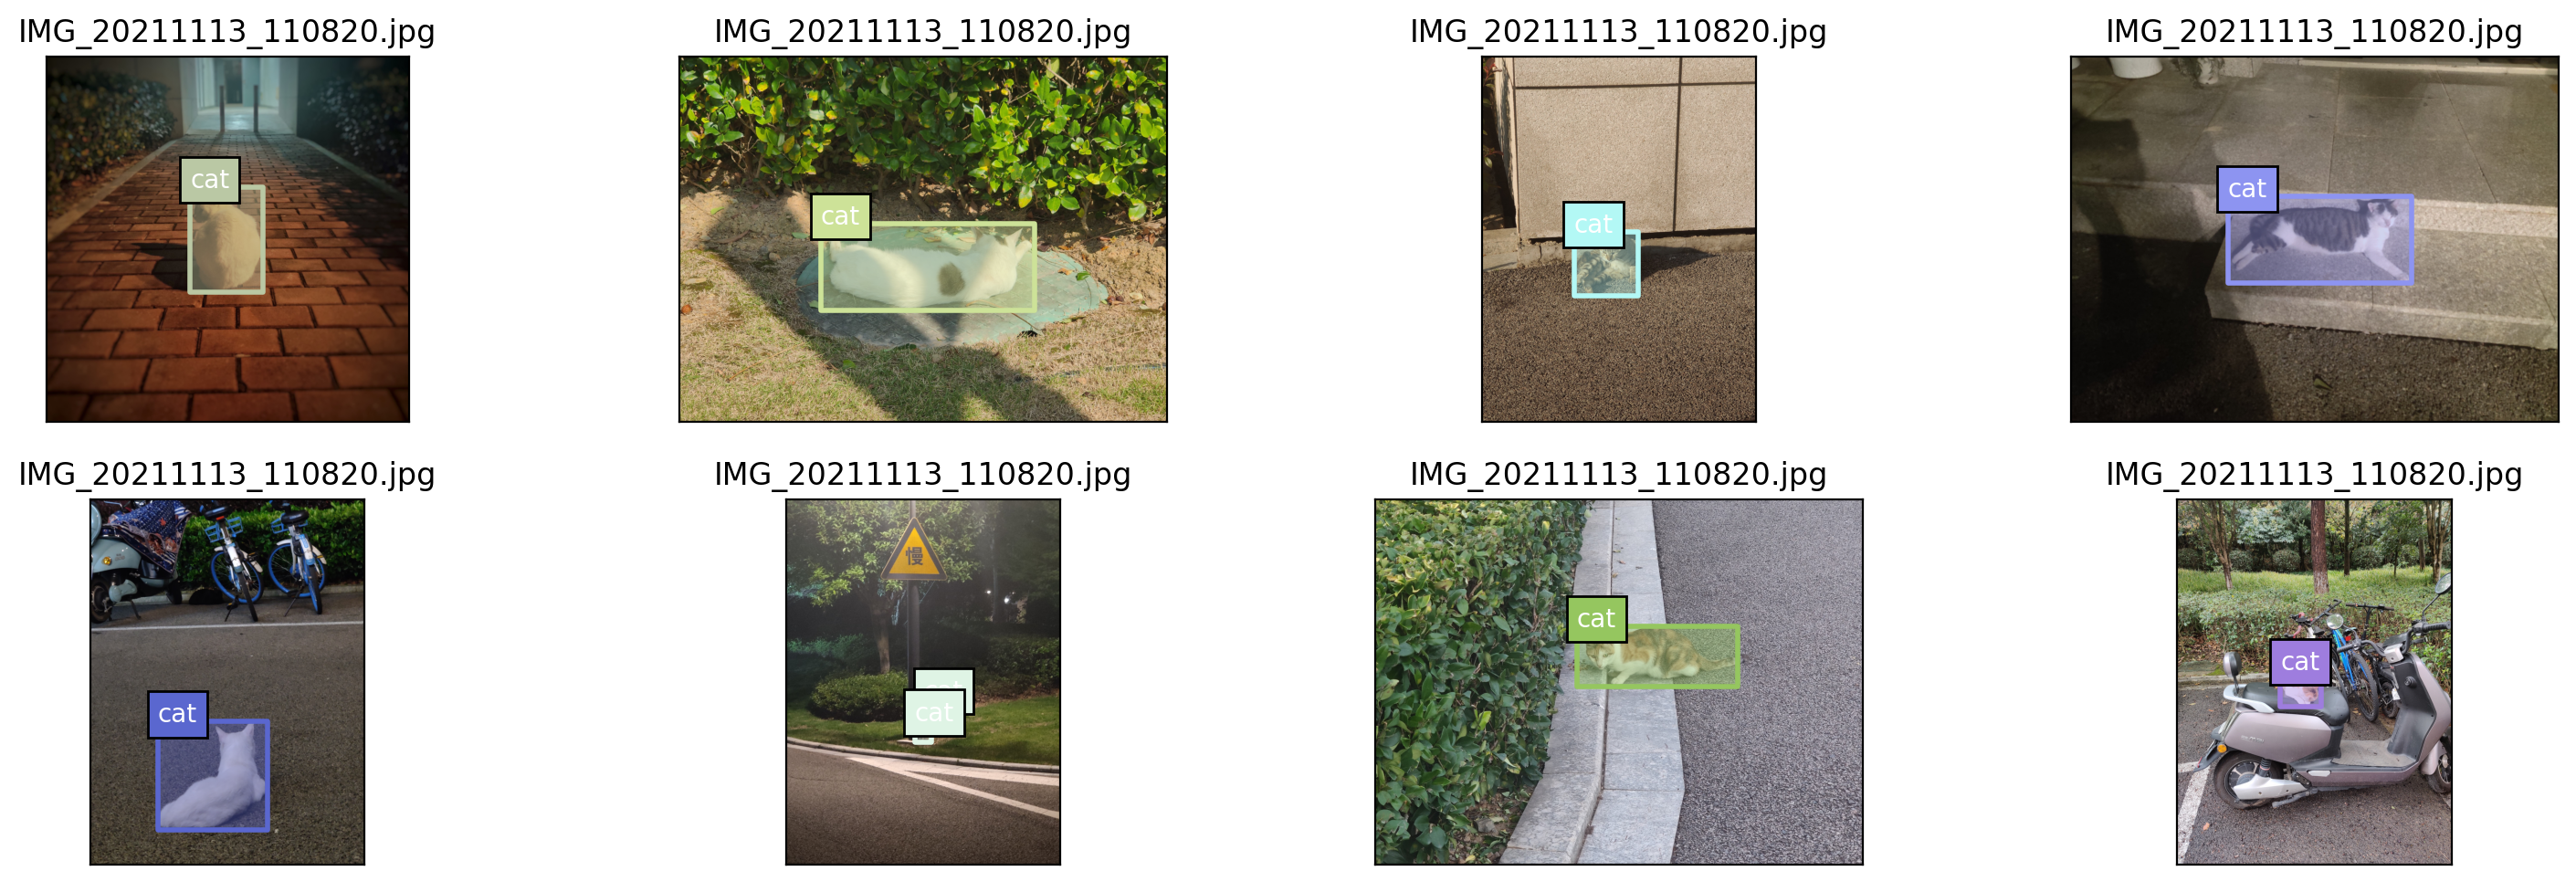

In [12]:
from pycocotools.coco import COCO
import numpy as np
import os.path as osp
from matplotlib.collections import PatchCollection
from matplotlib.patches import Polygon

def apply_exif_orientation(image):
    _EXIF_ORIENT = 274
    if not hasattr(image, 'getexif'):
        return image

    try:
        exif = image.getexif()
    except Exception:
        exif = None

    if exif is None:
        return image

    orientation = exif.get(_EXIF_ORIENT)

    method = {
        2: Image.FLIP_LEFT_RIGHT,
        3: Image.ROTATE_180,
        4: Image.FLIP_TOP_BOTTOM,
        5: Image.TRANSPOSE,
        6: Image.ROTATE_270,
        7: Image.TRANSVERSE,
        8: Image.ROTATE_90,
    }.get(orientation)
    if method is not None:
        return image.transpose(method)
    return image


def show_bbox_only(coco, anns, show_label_bbox=True, is_filling=True):
    """Show bounding box of annotations Only."""
    if len(anns) == 0:
        return

    ax = plt.gca()
    ax.set_autoscale_on(False)

    image2color = dict()
    for cat in coco.getCatIds():
        image2color[cat] = (np.random.random((1, 3)) * 0.7 + 0.3).tolist()[0]

    polygons = []
    colors = []

    for ann in anns:
        color = image2color[ann['category_id']]
        bbox_x, bbox_y, bbox_w, bbox_h = ann['bbox']
        poly = [[bbox_x, bbox_y], [bbox_x, bbox_y + bbox_h],
                [bbox_x + bbox_w, bbox_y + bbox_h], [bbox_x + bbox_w, bbox_y]]
        polygons.append(Polygon(np.array(poly).reshape((4, 2))))
        colors.append(color)

        if show_label_bbox:
            label_bbox = dict(facecolor=color)
        else:
            label_bbox = None

        ax.text(
            bbox_x,
            bbox_y,
            '%s' % (coco.loadCats(ann['category_id'])[0]['name']),
            color='white',
            bbox=label_bbox)

    if is_filling:
        p = PatchCollection(
            polygons, facecolor=colors, linewidths=0, alpha=0.4)
        ax.add_collection(p)
    p = PatchCollection(
        polygons, facecolor='none', edgecolors=colors, linewidths=2)
    ax.add_collection(p)

    
coco = COCO('cat_dataset/annotations/test.json')
image_ids = coco.getImgIds()
np.random.shuffle(image_ids)

plt.figure(figsize=(16, 5))

# 只可视化 8 张图片
for i in range(8):
    image_data = coco.loadImgs(image_ids[i])[0]
    image_path = osp.join('cat_dataset/images/',image_data['file_name'])
    annotation_ids = coco.getAnnIds(
            imgIds=image_data['id'], catIds=[], iscrowd=0)
    annotations = coco.loadAnns(annotation_ids)
    
    ax = plt.subplot(2, 4, i+1)
    image = Image.open(image_path).convert("RGB")
    
    # 这行代码很关键，否则可能图片和标签对不上
    image=apply_exif_orientation(image)
    
    ax.imshow(image)
    
    show_bbox_only(coco, annotations)
    
    plt.title(f"{filename}")
    plt.xticks([])
    plt.yticks([])
        
plt.tight_layout()    